In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# checking categotical data and numerical data
cat_data = df.select_dtypes(include=['object'])
num_data = df.select_dtypes(exclude=['object'])

print(f'cat_data: {cat_data.shape[1]} features')
print(f'num_data: {num_data.shape[1]} features')

cat_data: 1 features
num_data: 20 features


<Axes: xlabel='price', ylabel='Count'>

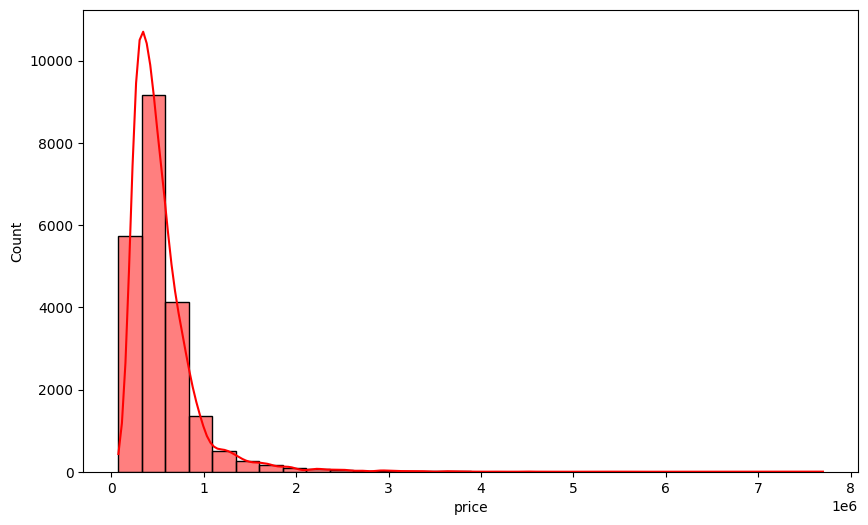

In [6]:
# visualizing the distribution of the target variable
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, color='r', bins=30)

<Axes: xlabel='bedrooms', ylabel='count'>

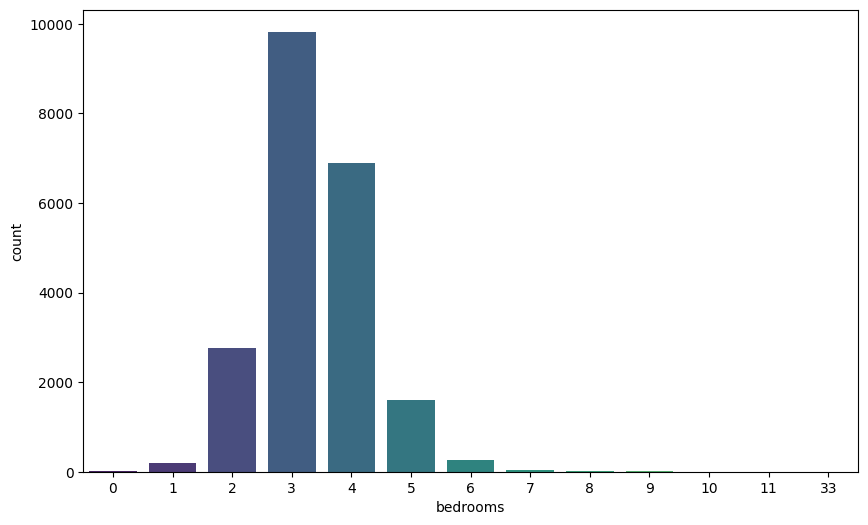

In [7]:
# distribution of the number of bedrooms
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bedrooms', palette='viridis')

<Axes: xlabel='bathrooms', ylabel='count'>

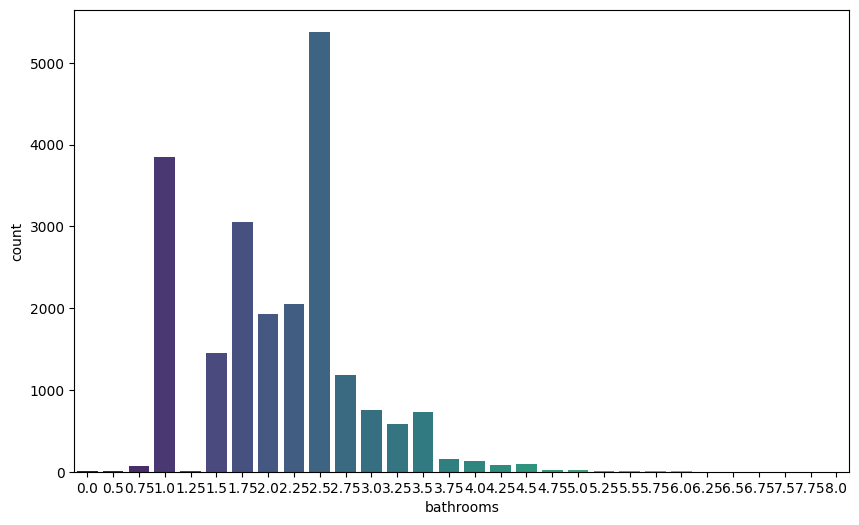

In [8]:
# distribution of the number of bathrooms
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bathrooms', palette='viridis')

<Axes: xlabel='floors', ylabel='count'>

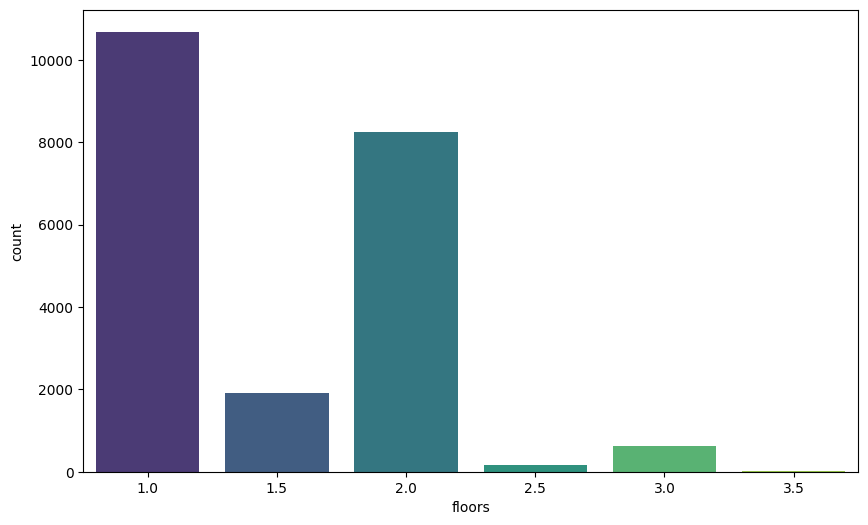

In [9]:
# distribution of the number of floors
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='floors', palette='viridis')

In [10]:
# top 5 most expensive houses
df.nlargest(5, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [11]:
# top 5 cheapest houses
df.nsmallest(5, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


Text(0.5, 1.0, 'Distribution of sqft_lot15')

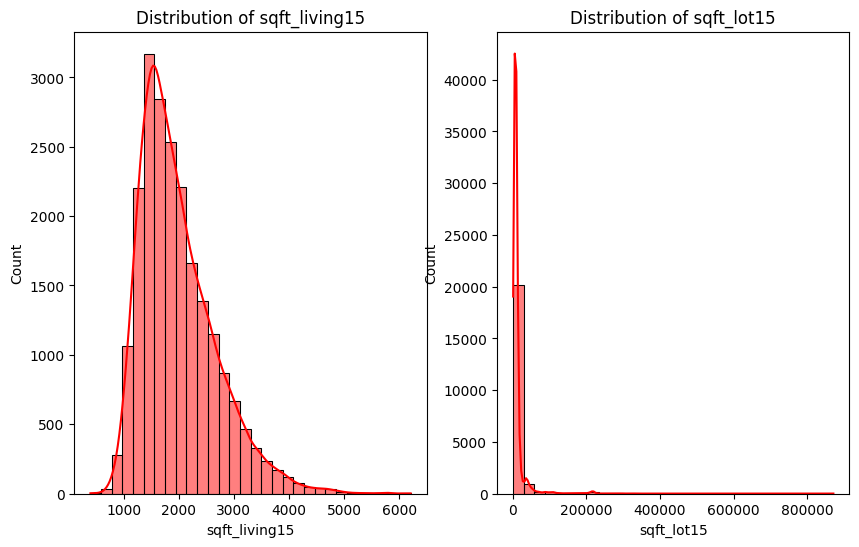

In [12]:
# subplot for features "sqft_living15" and "sqft_lot15"
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['sqft_living15'], kde=True, color='r', bins=30)
plt.title('Distribution of sqft_living15')
plt.subplot(1,2,2)
sns.histplot(df['sqft_lot15'], kde=True, color='r', bins=30)
plt.title('Distribution of sqft_lot15')

Text(0.5, 1.0, 'Number of houses with waterfront')

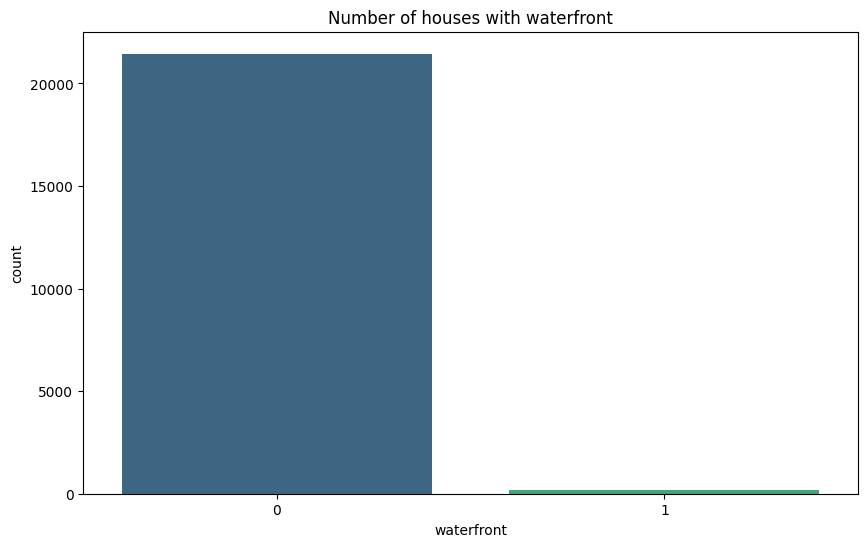

In [13]:
# countplot for the number of houses with waterfront
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='waterfront', palette='viridis')
plt.title('Number of houses with waterfront')

Text(0.5, 1.0, 'Number of houses with condition')

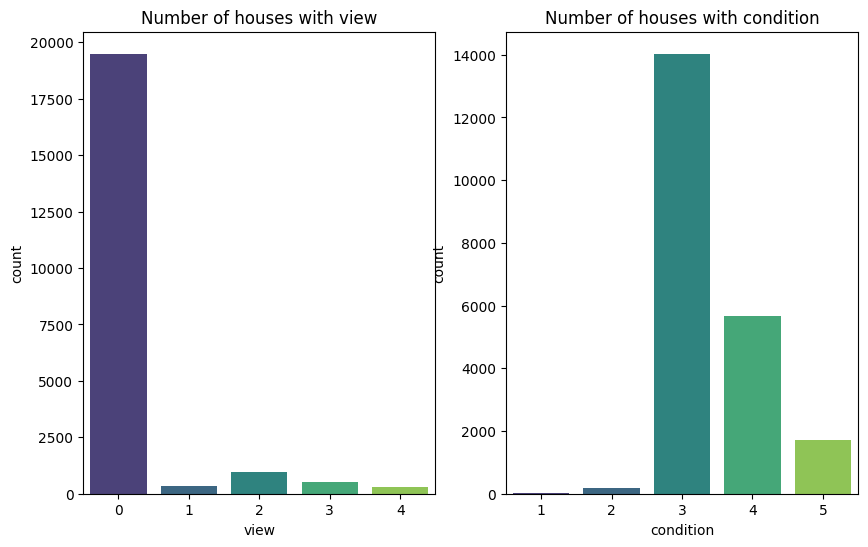

In [14]:
# subplot for view and condition
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='view', palette='viridis')
plt.title('Number of houses with view')
plt.subplot(1,2,2)
sns.countplot(data=df, x='condition', palette='viridis')
plt.title('Number of houses with condition')

Text(0.5, 1.0, 'Number of houses with grade')

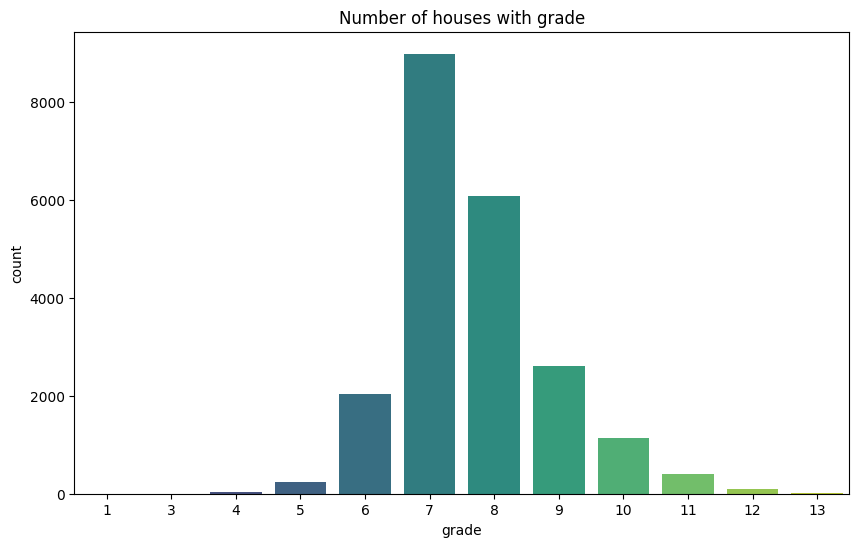

In [15]:
# countplot for the number of houses with grade
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='grade', palette='viridis')
plt.title('Number of houses with grade')

Text(0.5, 1.0, 'Price of houses over the years houses were built')

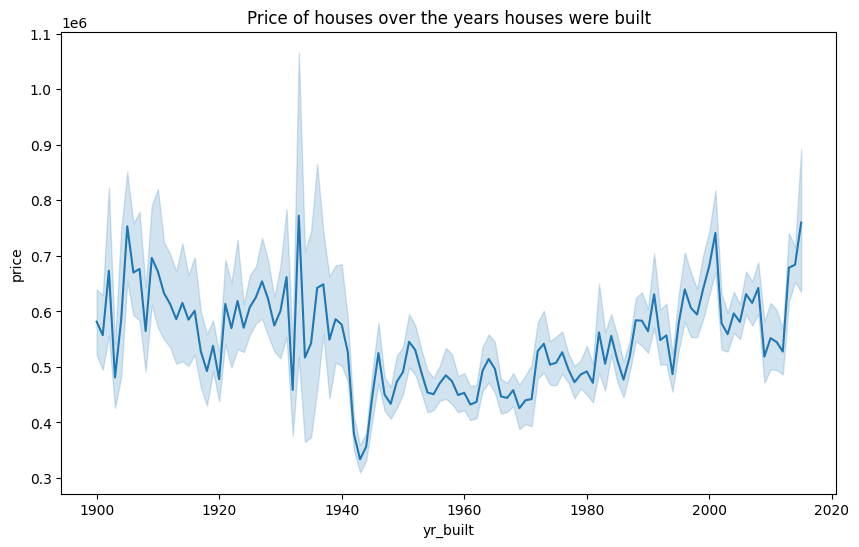

In [16]:
# line plot for year built and price
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='yr_built', y='price')
plt.title('Price of houses over the years houses were built')

Text(0.5, 1.0, 'Price of houses over the years houses were renovated')

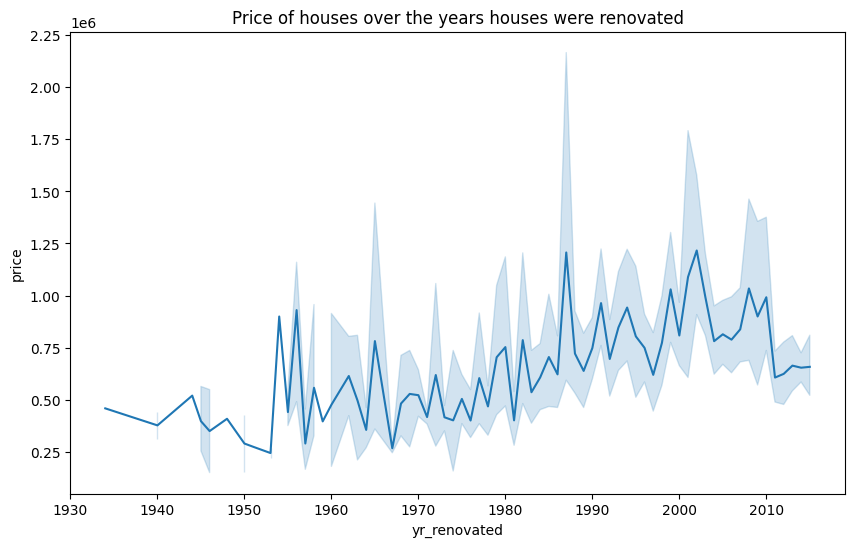

In [17]:
# line plot for year renovated and price between 1900 and 2000

# Assuming df is your DataFrame and it has been imported correctly
filtered_df = df[(df['yr_renovated'] >= 1900) & (df['yr_renovated'] <= 2015)]
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were renovated')

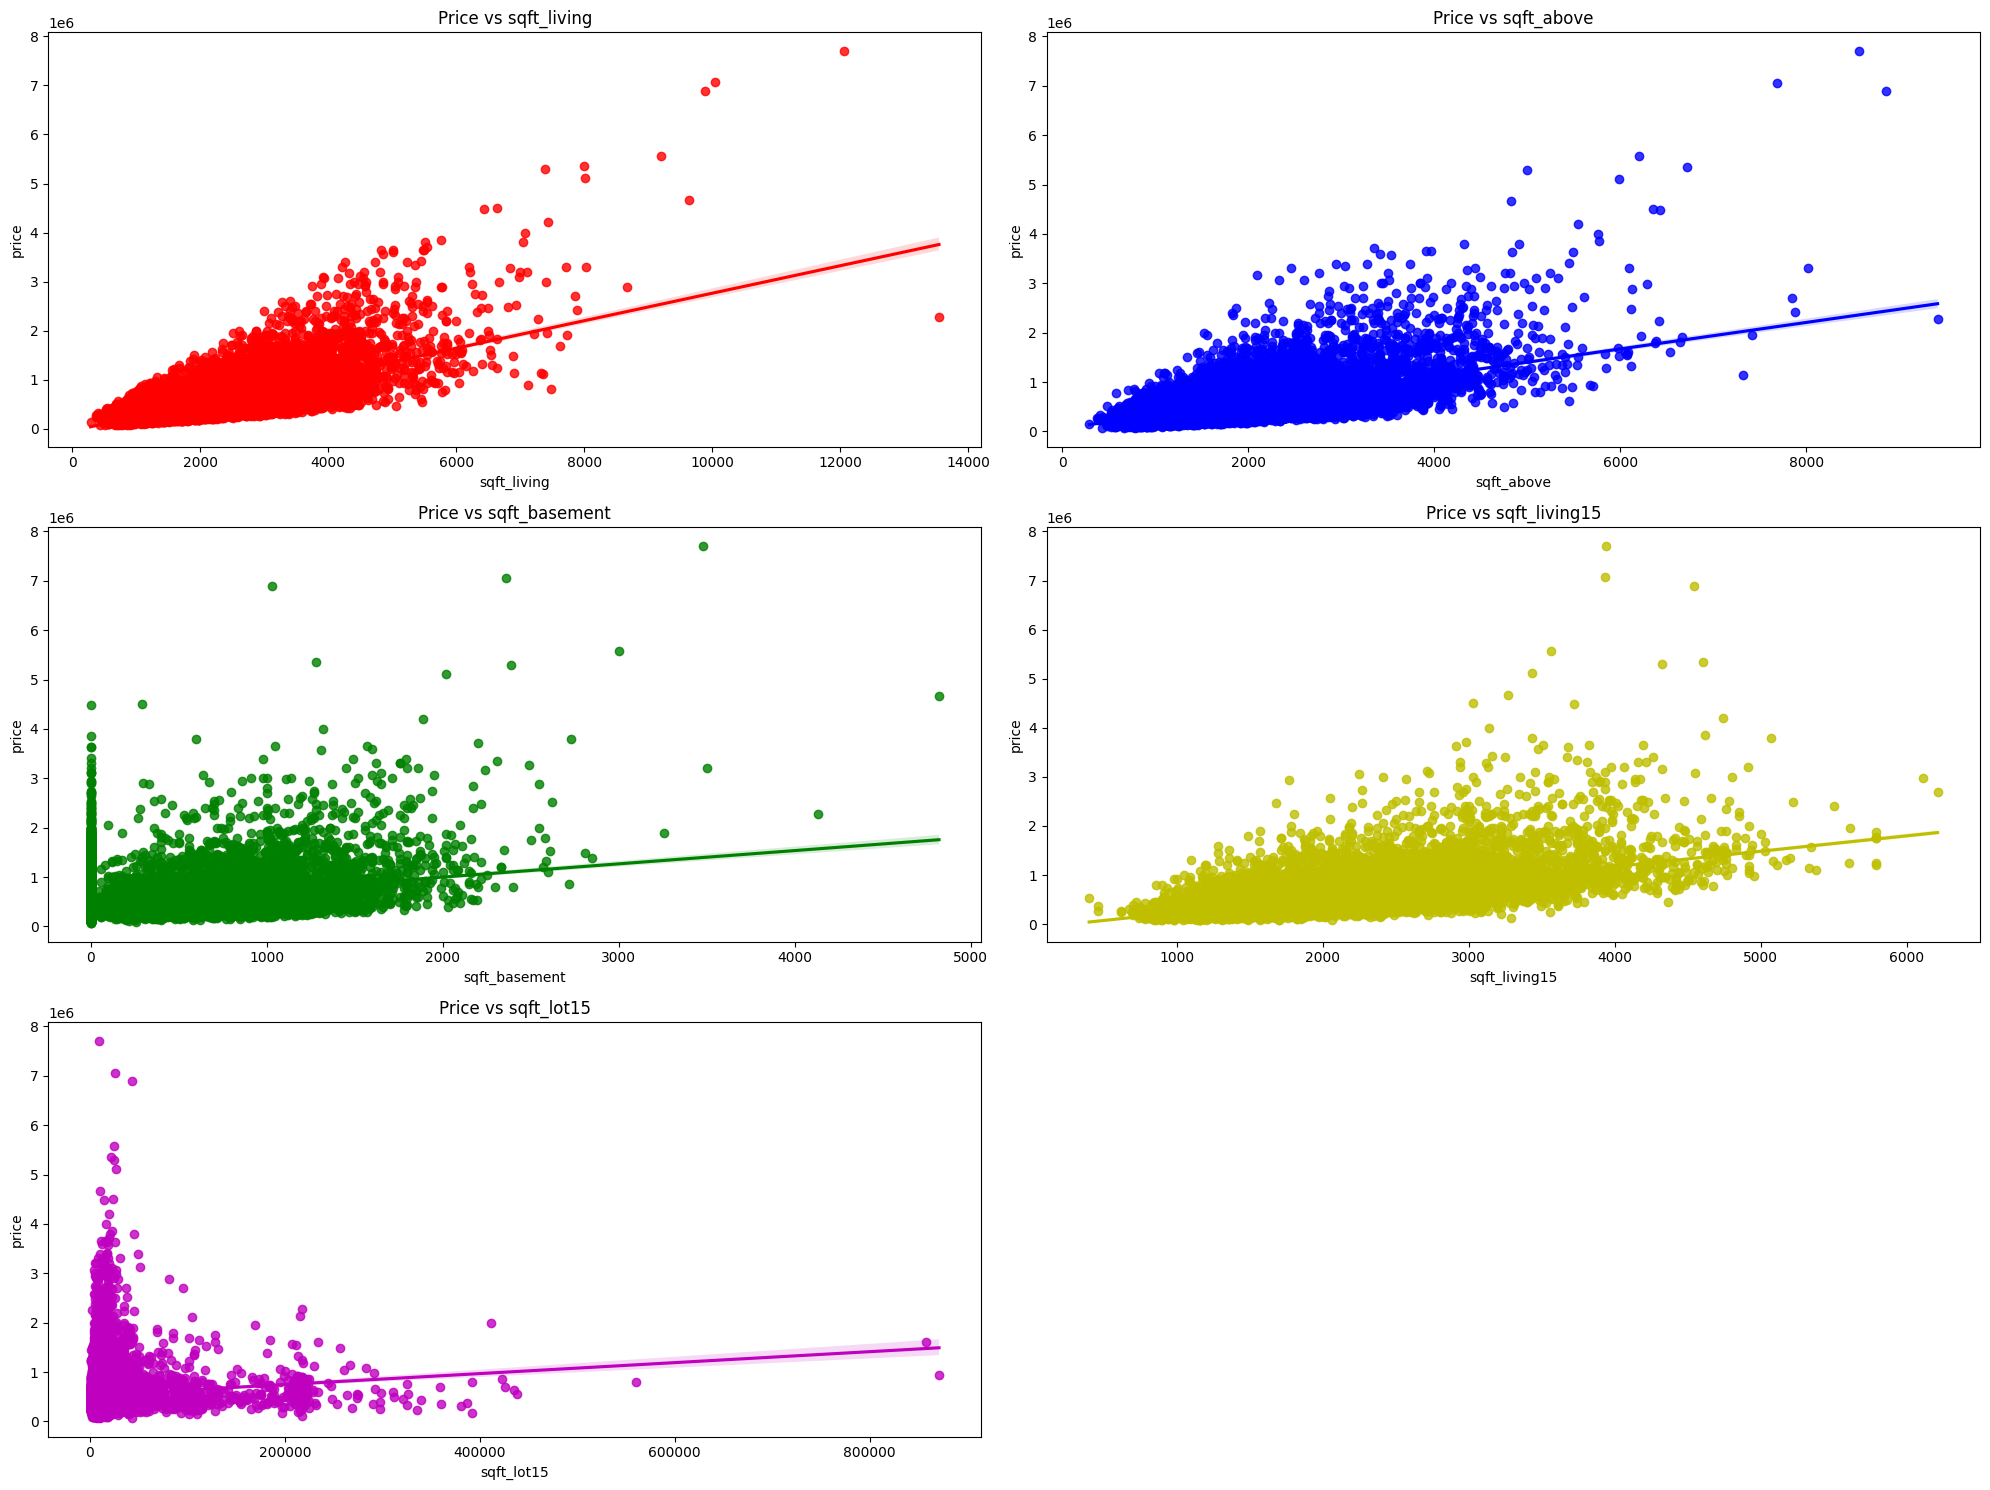

In [18]:
# subplot for scatter plots of price and sqft_living, sqft_above, sqft_basement, sqft_living15, sqft_lot15 and add a regression line
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.regplot(data=df, x='sqft_living', y='price', color='r')
plt.title('Price vs sqft_living')
plt.subplot(3,2,2)
sns.regplot(data=df, x='sqft_above', y='price', color='b')
plt.title('Price vs sqft_above')
plt.subplot(3,2,3)
sns.regplot(data=df, x='sqft_basement', y='price', color='g')
plt.title('Price vs sqft_basement')
plt.subplot(3,2,4)
sns.regplot(data=df, x='sqft_living15', y='price', color='y')
plt.title('Price vs sqft_living15')
plt.subplot(3,2,5)
sns.regplot(data=df, x='sqft_lot15', y='price', color='m')
plt.title('Price vs sqft_lot15')

plt.tight_layout()

Text(0.5, 1.0, 'Latitude and Longitude of the houses (Map of King County)')

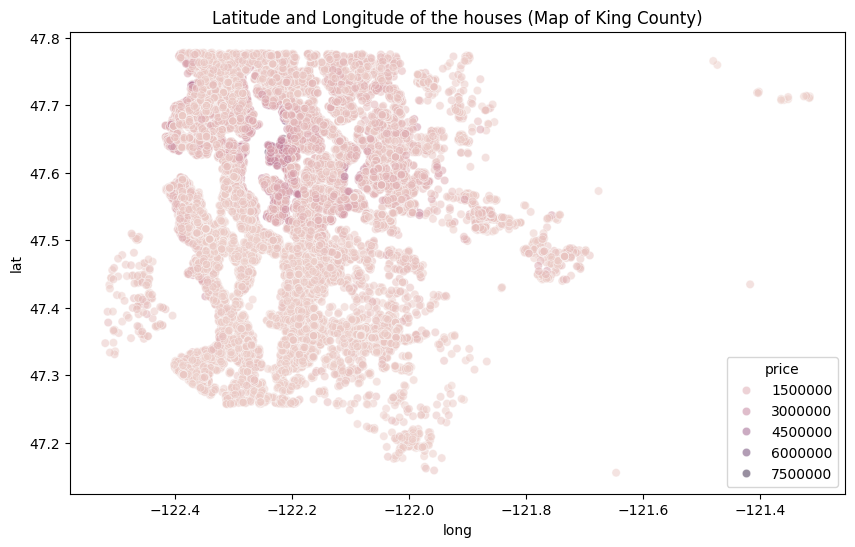

In [19]:
# latitude and longitude of the houses
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='long', y='lat', hue='price',alpha=0.5)
plt.title('Latitude and Longitude of the houses (Map of King County)')

Text(0.5, 1.0, 'Map of King County')

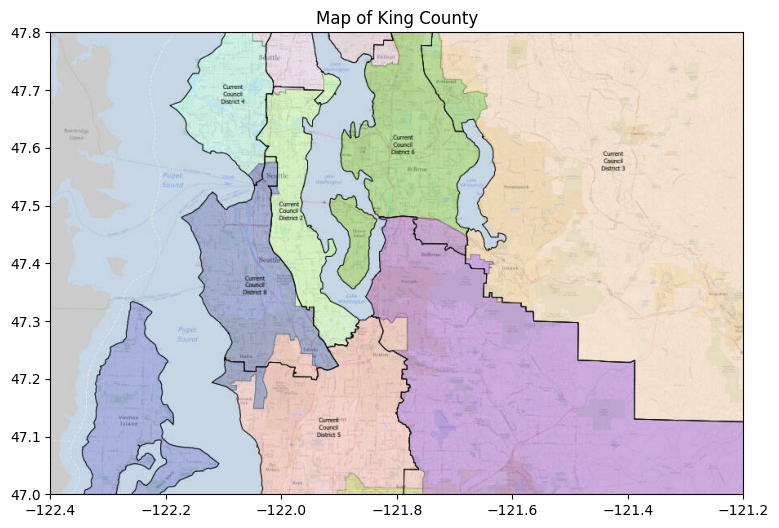

In [20]:
# actual map (image) of King County
plt.figure(figsize=(10,6))
img = plt.imread(r"E:\Project\House Price Prediction\notebooks\data\king_country.jpg")
plt.imshow(img, extent=[-122.4, -121.2, 47, 47.8])
plt.xlim(-122.4, -121.2)
plt.ylim(47, 47.8)
plt.title('Map of King County')

Text(0.5, 1.0, 'Heatmap of the correlation between the features')

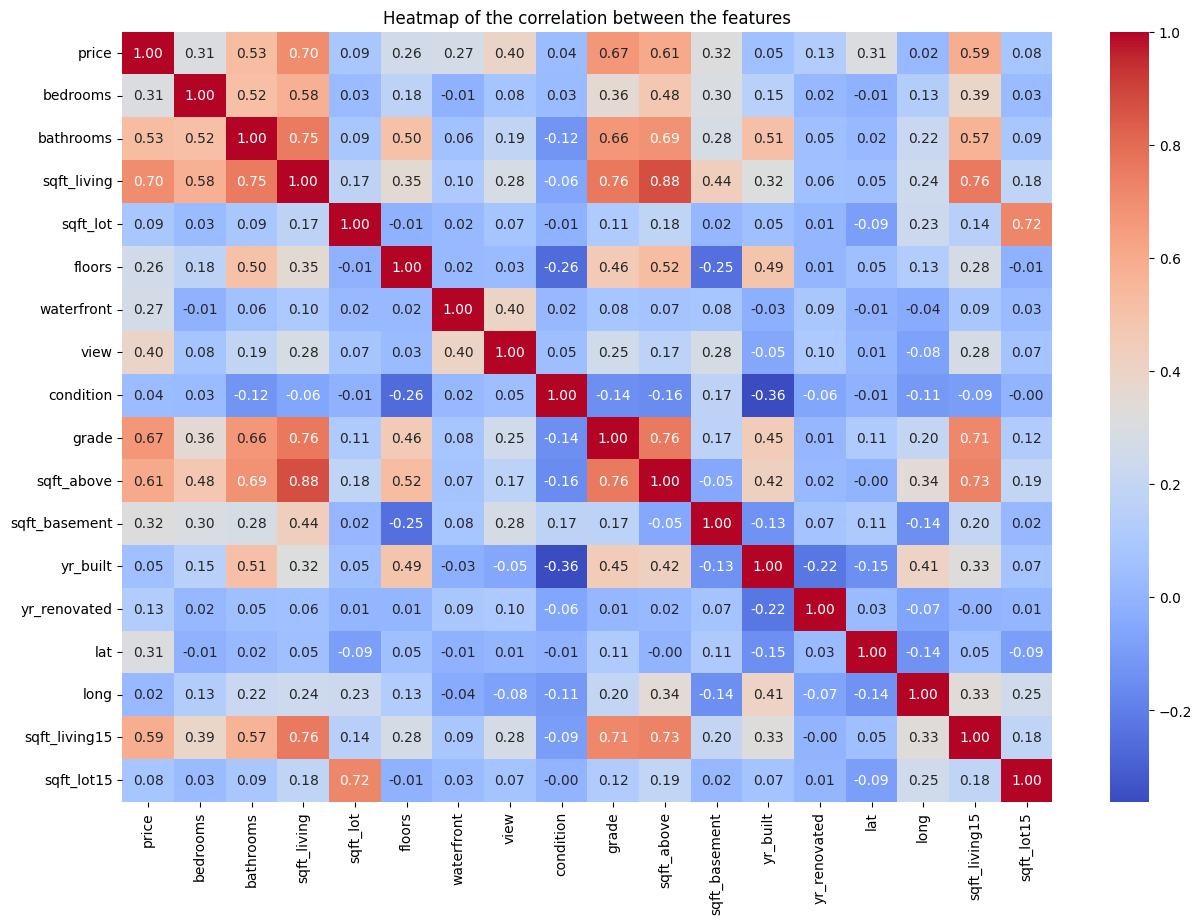

In [21]:
# heatmap of the correlation between the features excluding the id and zipcode column
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['id', 'zipcode', 'date'], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of the correlation between the features')

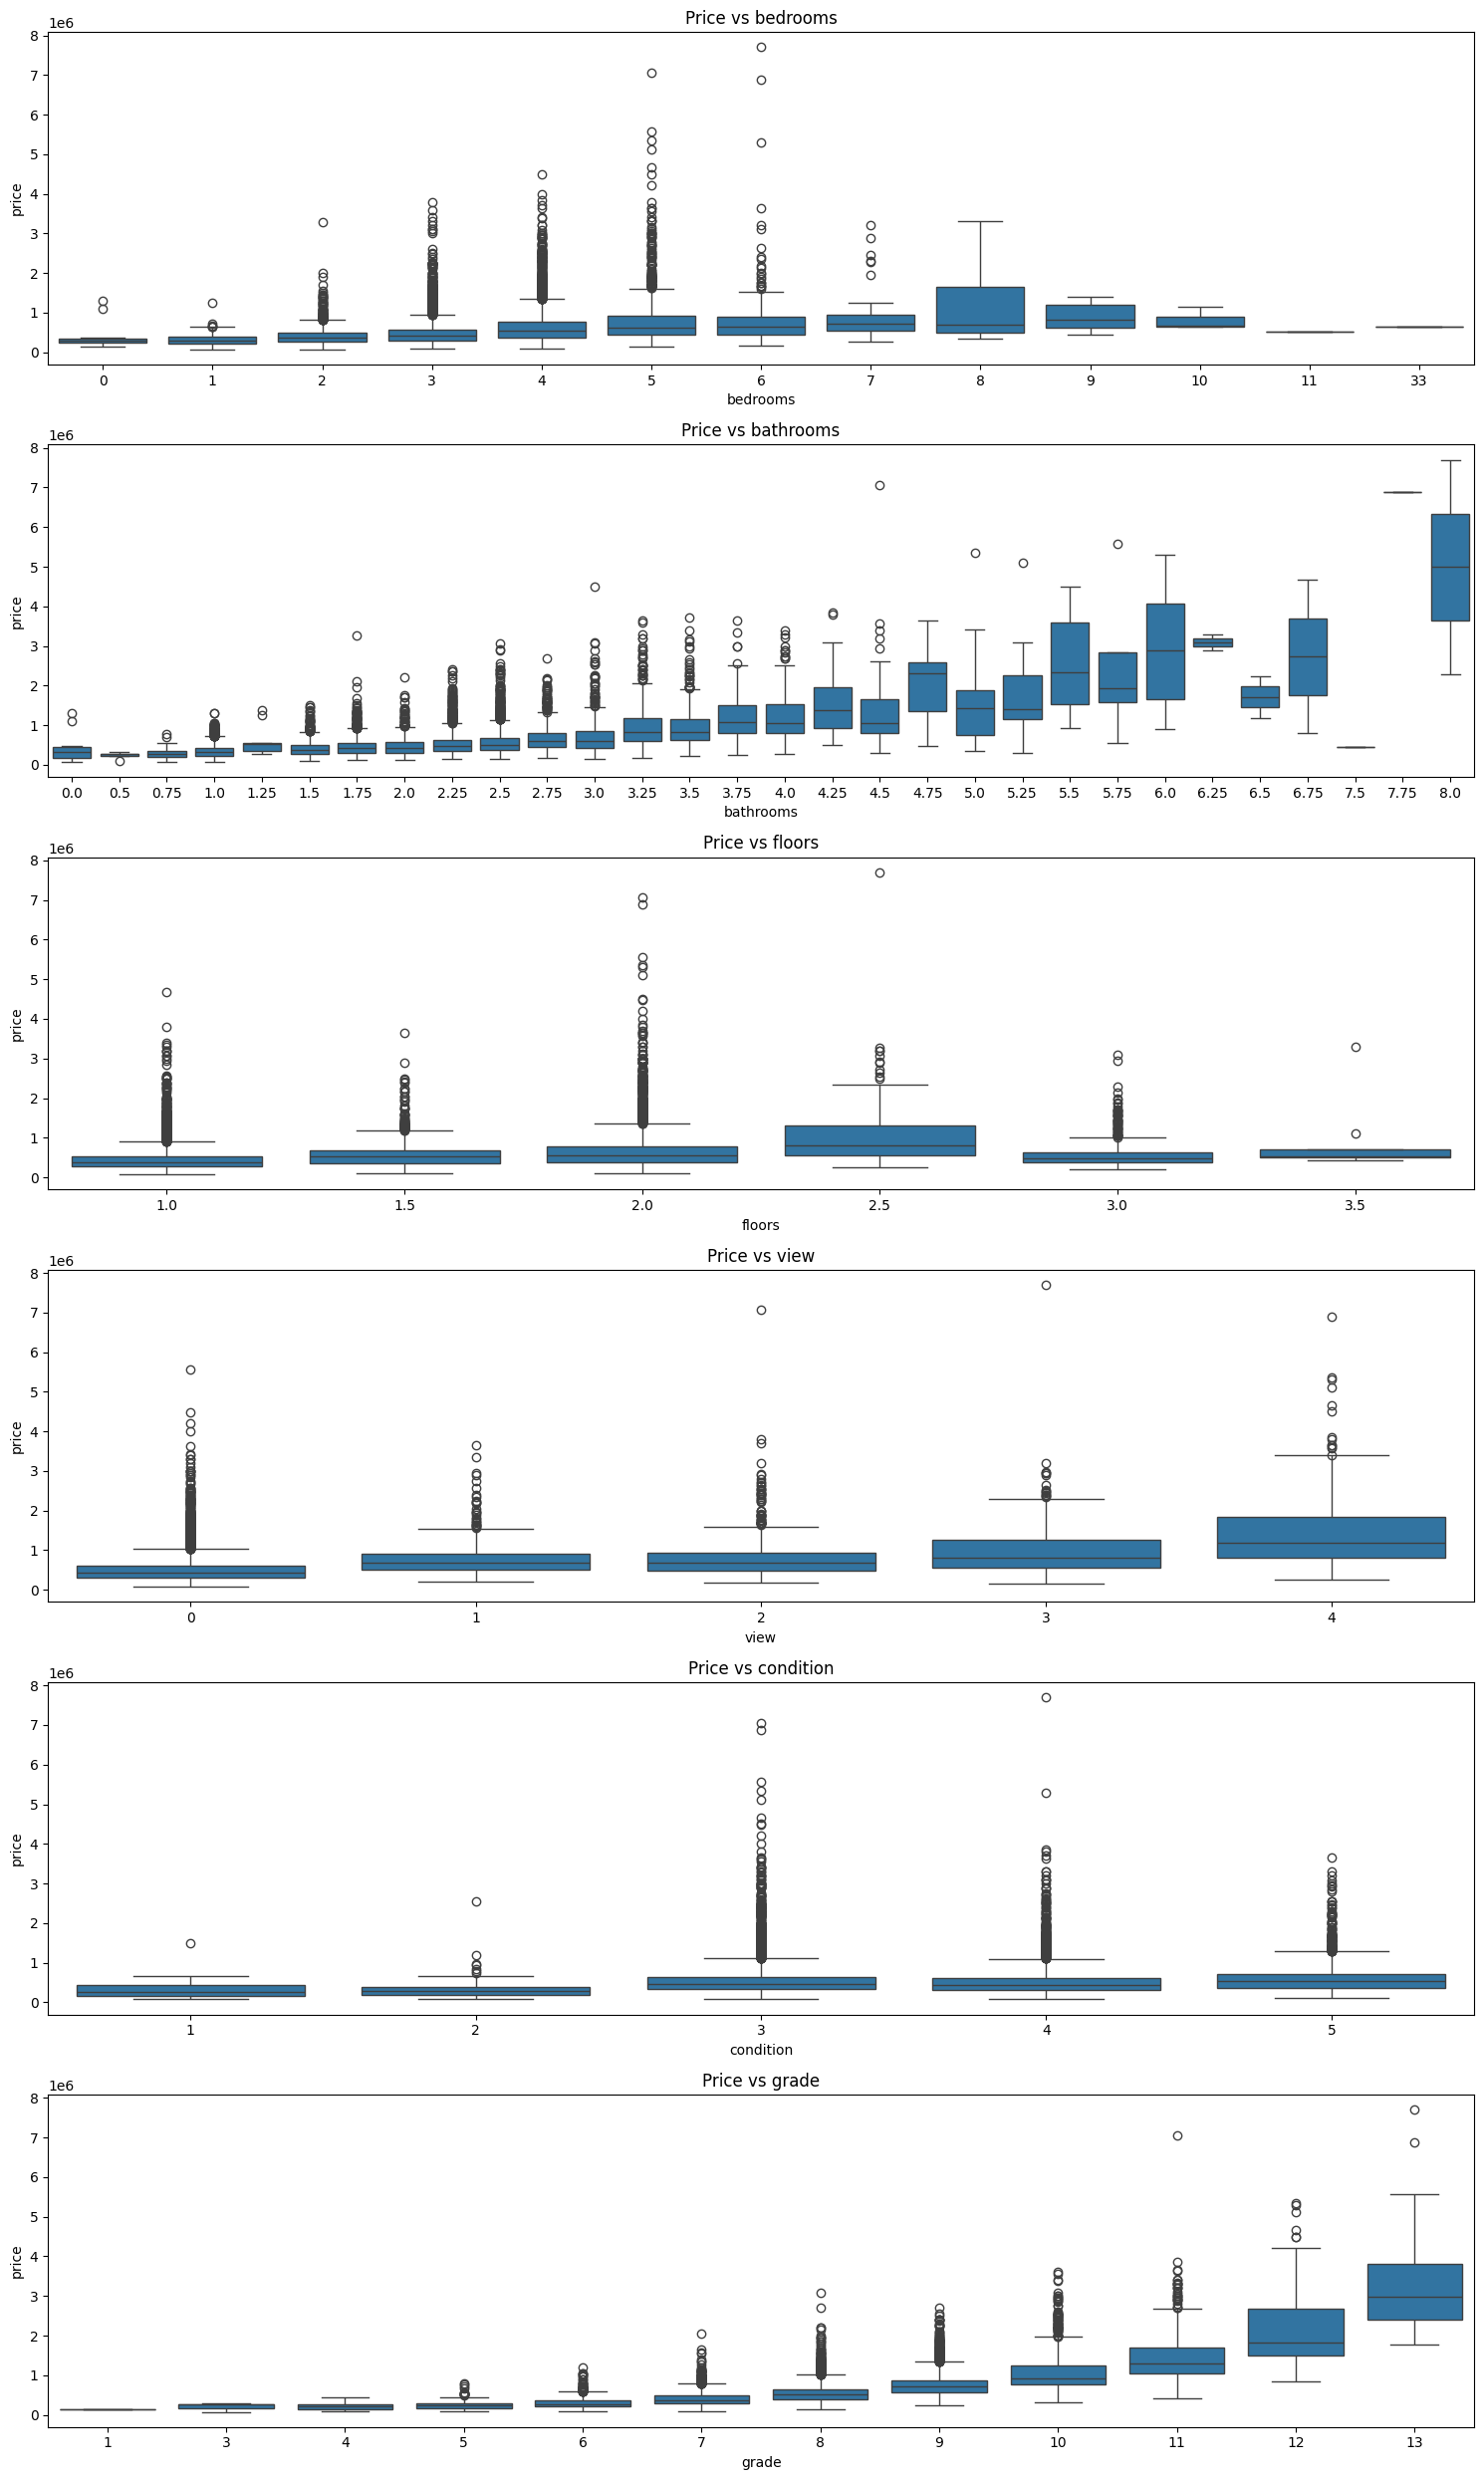

In [22]:
# boxplot for the price and the number of bedrooms, bathrooms, floors, view, condition, grade
plt.figure(figsize=(15,25))
plt.subplot(6,1,1)
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price vs bedrooms')

plt.subplot(6,1,2)
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title('Price vs bathrooms')

plt.subplot(6,1,3)
sns.boxplot(data=df, x='floors', y='price')
plt.title('Price vs floors')

plt.subplot(6,1,4)
sns.boxplot(data=df, x='view', y='price')
plt.title('Price vs view')

plt.subplot(6,1,5)
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price vs condition')

plt.subplot(6,1,6)
sns.boxplot(data=df, x='grade', y='price')
plt.title('Price vs grade')

plt.tight_layout()

Text(0.5, 1.0, 'Price vs sqft_living hue by waterfront')

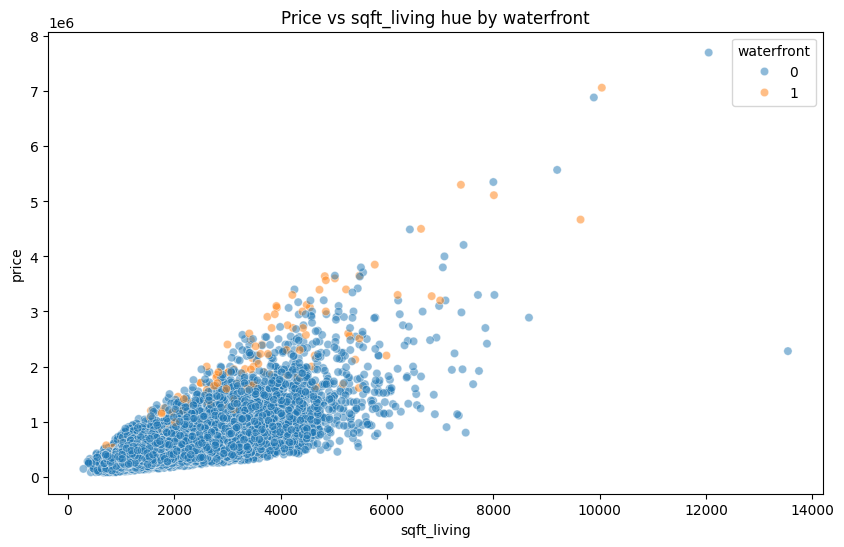

In [23]:
# scatter plot for the price and the sqft_living hue by the waterfront
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='waterfront', alpha=0.5)
plt.title('Price vs sqft_living hue by waterfront')

### Data Pre-processing

(1) Remove irrelevant columns

In [31]:
# remove id and date columns
df = df.drop('id', axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
sum(df['sqft_basement']==0)

13126

In [33]:
# Assuming df is your DataFrame and it has been imported correctly
correlation = df['zipcode'].corr(df['price'])
print(f"The correlation between zipcode and price is: {correlation}")

The correlation between zipcode and price is: -0.05320285429832562


Conclusion: Column 'zipcode' don't have good coorelation with target feature 'price'. Remove it from dataframe

In [34]:
df = df.drop('zipcode', axis=1)

In [35]:
sum(df['yr_renovated'] < 1940)

20700

In [36]:
# feature engineering date column
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


Text(0.5, 1.0, 'Price of houses over the years')

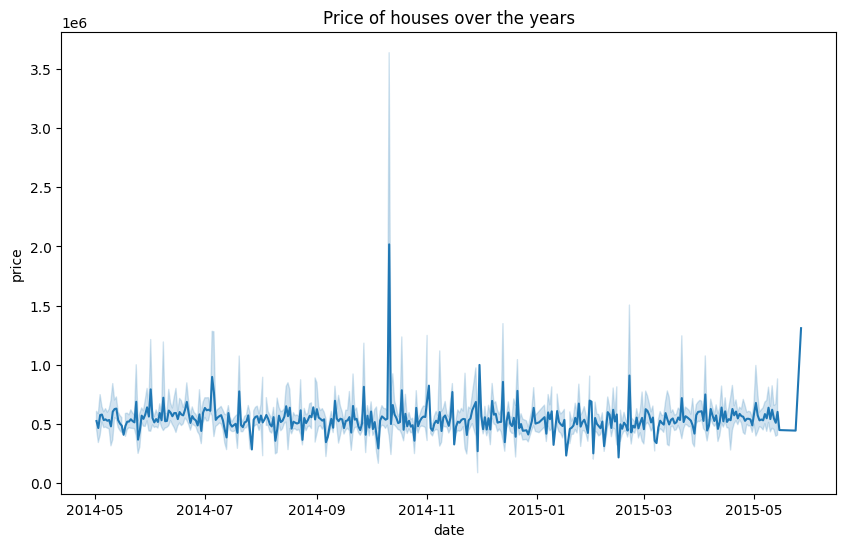

In [37]:
# lineplot for the price and the date
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='price')
plt.title('Price of houses over the years')

Text(0.5, 1.0, 'Price of houses over the years')

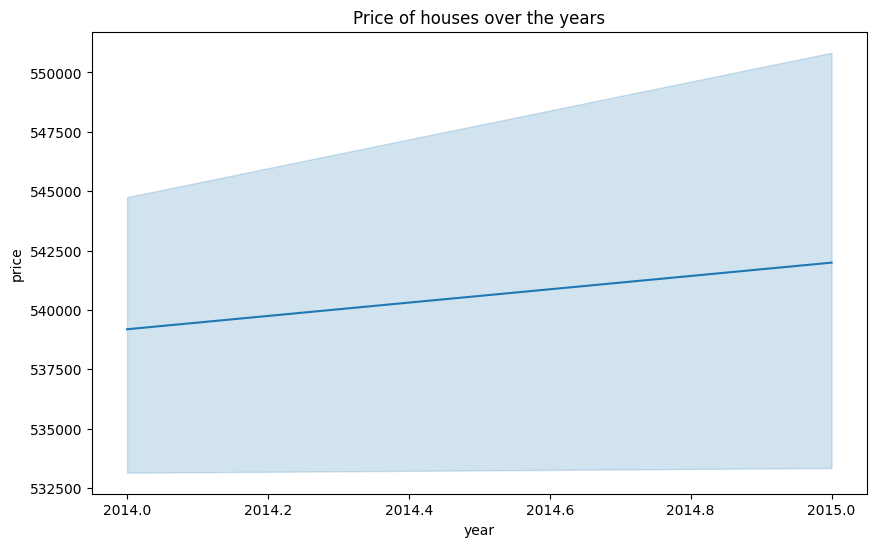

In [38]:
# lineplot for the price and the year
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='price')
plt.title('Price of houses over the years')

In [40]:
df = df.drop('date', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [41]:
# feature engineering the year column
df['house_age'] = df['year'] - df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,28


In [ ]:
# 